In [15]:
from pyproj import CRS

# Define a CRS using EPSG code (for example, EPSG:4326 for WGS84)
crs = CRS.from_epsg(4326)

# Print the CRS details
print(crs)


EPSG:4326


Define and Print a CRS

In [16]:
from pyproj import CRS

# Define a CRS using EPSG code (WGS84)
crs = CRS.from_epsg(4326)

# Print the CRS details
print(crs)


EPSG:4326


Transform Coordinates Between Two CRS

In [17]:
from pyproj import CRS, Transformer

# Define the source and target CRS
crs_wgs84 = CRS.from_epsg(4326)  # WGS84
crs_utm33n = CRS.from_epsg(32633)  # UTM Zone 33N

# Create a transformer object
transformer = Transformer.from_crs(crs_wgs84, crs_utm33n)

# Define a point in WGS84 coordinates (longitude, latitude)
longitude, latitude = 12.4924, 41.8902  # Example: Coordinates of the Colosseum in Rome

# Transform the point to UTM coordinates
easting, northing = transformer.transform(latitude, longitude)

print(f"WGS84 Coordinates: ({longitude}, {latitude})")
print(f"UTM Zone 33N Coordinates: ({easting}, {northing})")


WGS84 Coordinates: (12.4924, 41.8902)
UTM Zone 33N Coordinates: (291962.5878898157, 4640626.111926911)


Define a Custom CRS

In [18]:
from pyproj import CRS

# Define a custom CRS using a PROJ string
proj_string = "+proj=utm +zone=33 +datum=WGS84 +units=m +no_defs"
custom_crs = CRS.from_proj4(proj_string)

# Print the custom CRS details
print(custom_crs)


+proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +type=crs


 Getting CRS Information

In [19]:
from pyproj import CRS

# Define a CRS using EPSG code (WGS84)
crs = CRS.from_epsg(4326)

# Get various details about the CRS
print("CRS Name:", crs.name)
print("CRS Axis Info:", crs.axis_info)
print("CRS Area of Use:", crs.area_of_use)
print("CRS Datum:", crs.datum)
print("CRS Ellipsoid:", crs.ellipsoid)
print("CRS Prime Meridian:", crs.prime_meridian)


CRS Name: WGS 84
CRS Axis Info: [Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree), Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]
CRS Area of Use: - name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
CRS Datum: World Geodetic System 1984 ensemble
CRS Ellipsoid: WGS 84
CRS Prime Meridian: Greenwich


List All Available EPSG Codes

In [20]:
!pip install pyproj
from pyproj import CRS

# List some available EPSG codes
# Note: Listing all codes would be very long
for code in range(4326, 4330):  # Example range of codes
    crs = CRS.from_authority("EPSG", code)
    print(crs.to_epsg())

4326
4327
4328
4329


Plotting Coordinates on a Map

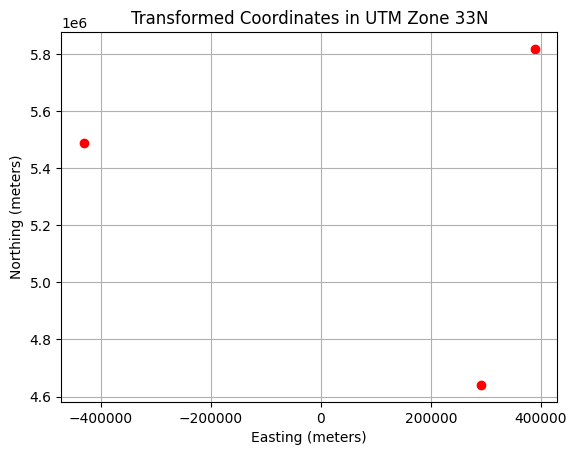

In [21]:
import matplotlib.pyplot as plt
from pyproj import CRS, Transformer

# Define the CRS for WGS84 and UTM Zone 33N
crs_wgs84 = CRS.from_epsg(4326)
crs_utm33n = CRS.from_epsg(32633)

# Create a transformer object
transformer = Transformer.from_crs(crs_wgs84, crs_utm33n)

# Define some points in WGS84 coordinates (longitude, latitude)
points = [
    (12.4924, 41.8902),  # Colosseum
    (13.3603, 52.5145),  # Brandenburg Gate
    (2.2945, 48.8584)    # Eiffel Tower
]

# Transform points to UTM coordinates
utm_points = [transformer.transform(lat, lon) for lon, lat in points]

# Extract easting and northing coordinates
eastings, northings = zip(*utm_points)

# Plot the points
plt.figure()
plt.scatter(eastings, northings, color='red')
plt.title('Transformed Coordinates in UTM Zone 33N')
plt.xlabel('Easting (meters)')
plt.ylabel('Northing (meters)')
plt.grid(True)
plt.show()
